In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from collections import Counter

In [3]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

### Data Upload

In [4]:
df = pd.read_csv("RTA Dataset.csv", na_values=['Unknown','unknown','na']) 

In [5]:
df.shape #12316, 32

(12316, 32)

In [6]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3.0,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [7]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver             1548
Sex_of_driver                   178
Educational_level               841
Vehicle_driver_relation         593
Driving_experience              862
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        6811
Defect_of_vehicle              4427
Area_accident_occured           261
Lanes_or_Medians                442
Road_allignment                 142
Types_of_Junction              1078
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions              292
Type_of_collision               169
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                396
Casualty_class                 4443
Sex_of_casualty                4443
Age_band_of_casualty           4443
Casualty_severity              4443
Work_of_casuality           

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         12316 non-null  object 
 1   Day_of_week                  12316 non-null  object 
 2   Age_band_of_driver           10768 non-null  object 
 3   Sex_of_driver                12138 non-null  object 
 4   Educational_level            11475 non-null  object 
 5   Vehicle_driver_relation      11723 non-null  object 
 6   Driving_experience           11454 non-null  object 
 7   Type_of_vehicle              11366 non-null  object 
 8   Owner_of_vehicle             11834 non-null  object 
 9   Service_year_of_vehicle      5505 non-null   object 
 10  Defect_of_vehicle            7889 non-null   object 
 11  Area_accident_occured        12055 non-null  object 
 12  Lanes_or_Medians             11874 non-null  object 
 13  Road_allignment 

### Exploratory Data Analysis

In [9]:
df.describe() # Only numerical features

,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity
count,12316.000000,12316.000000,7873.000000
mean,2.040679,1.548149,2.895466
std,0.688790,1.007179,0.316583
min,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000
50%,2.000000,1.000000,3.000000
75%,2.000000,2.000000,3.000000
max,7.000000,8.000000,3.000000


In [10]:
df.describe(include=['O']).T # categorical fetaures

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,10768,4,18-30,4271
Sex_of_driver,12138,2,Male,11437
Educational_level,11475,6,Junior high school,7619
Vehicle_driver_relation,11723,3,Employee,9627
Driving_experience,11454,6,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,5505,5,2-5yrs,1792


In [11]:
# Checking unique classes in each feature
for i in df.columns:
    print(f" {i}:-",df[i].unique())

 Time:- ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
 Day_of_week:- ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
 Age_band_of_driver:- ['18-30' '31-50' 'Under 18' 'Over 51' nan]
 Sex_of_driver:- ['Male' 'Female' nan]
 Educational_level:- ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
 Vehicle_driver_relation:- ['Employee' nan 'Owner' 'Other']
 Driving_experience:- ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr']
 Type_of_vehicle:- ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
 Owner_of_vehicle:- ['Owner' 'Governmental' nan 'Organization' 'Other']
 Service_year_of_vehicle:- ['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Below 1yr']
 Defect_of_v

In [12]:
#  Checking Imbaance in target variable

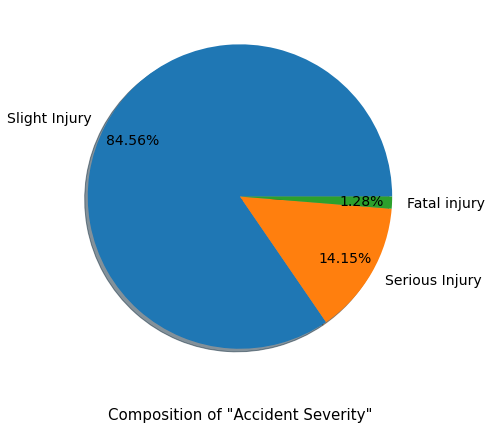

In [13]:
plt.figure(figsize=(14,7))
plt.pie(df["Accident_severity"].value_counts(),
        labels=list(df["Accident_severity"].unique()),
        pctdistance=0.8,
        autopct='%1.2f%%',
        shadow=True,
        textprops={'fontsize':14}
       )
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.show()

In [14]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [15]:
# Extracting time features from 'Time'

df['Time'] = pd.to_datetime(df['Time'])
df['hour'] = df['Time'].dt.hour

df.drop(columns = ['Time'], inplace=True)

In [16]:
df.shape

(12316, 32)

In [17]:
#### Counntplot of fetaures

In [18]:
df['Lanes_or_Medians'].value_counts()

Two-way (divided with broken lines road marking)    4411
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Name: Lanes_or_Medians, dtype: int64

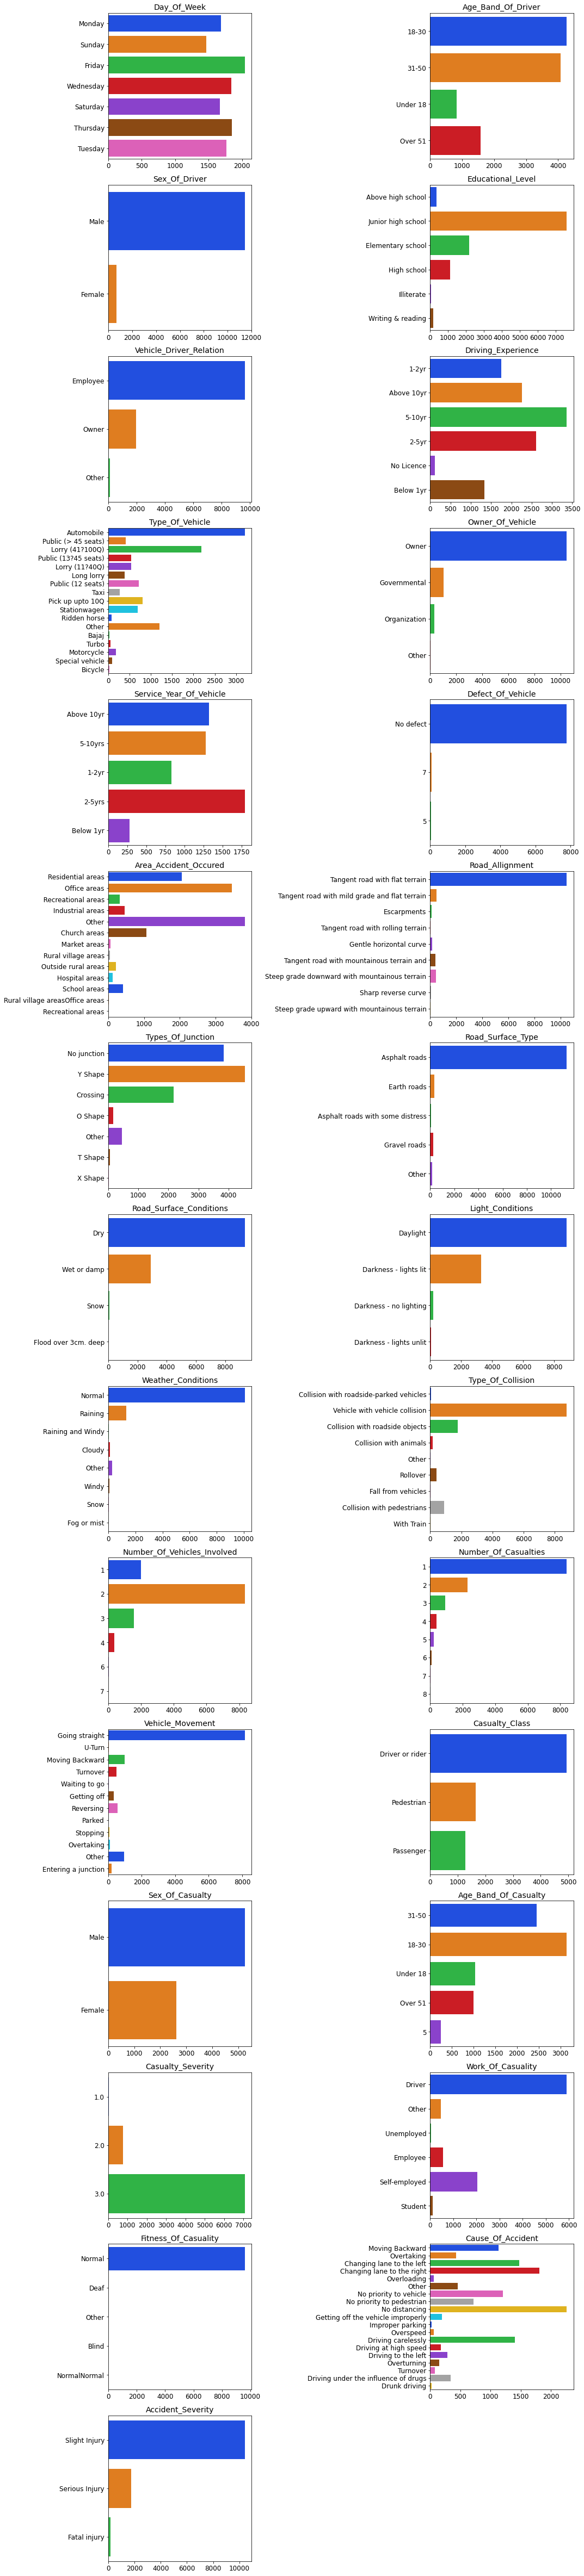

In [19]:
plt.figure(figsize=(15,70))
p=1

for col in df.drop(['hour', 'Lanes_or_Medians', 'Pedestrian_movement'], axis=1):
    ax = plt.subplot(16,2,p)
    sns.countplot(data=df, y=col, palette='bright')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(col.title(), fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    p+=1
plt.tight_layout()

In [20]:
### Gender: Male vs Female

In [21]:
percentage_sex=[df.groupby(['Sex_of_driver']).size()/df["Sex_of_driver"].count()]
print(percentage_sex)

[Sex_of_driver
Female    0.057753
Male      0.942247
dtype: float64]


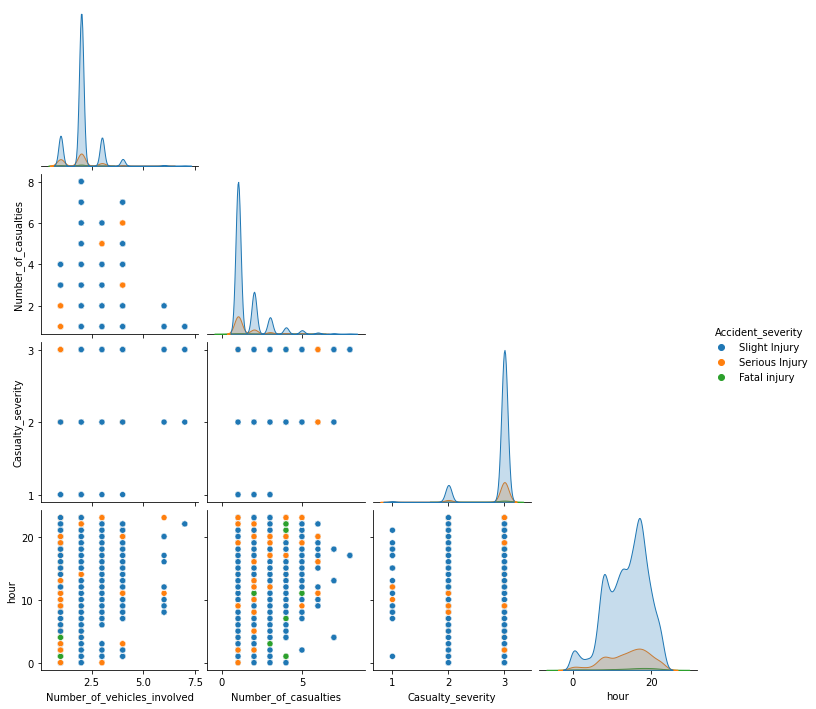

In [22]:
sns.pairplot(data=df, diag_kind='kde',hue='Accident_severity',corner=True) 
sns.set_context("paper", rc={"axes.labelsize":18})
sns.set_context("notebook", font_scale=1.5)

### PreProcessing

##### a) Dropping features based on percentage of missing values

In [23]:
percent_nan = df.isnull().sum() * 100 / len(df)
print(percent_nan)

Day_of_week                     0.000000
Age_band_of_driver             12.569016
Sex_of_driver                   1.445274
Educational_level               6.828516
Vehicle_driver_relation         4.814875
Driving_experience              6.999026
Type_of_vehicle                 7.713543
Owner_of_vehicle                3.913608
Service_year_of_vehicle        55.302046
Defect_of_vehicle              35.945112
Area_accident_occured           2.119195
Lanes_or_Medians                3.588828
Road_allignment                 1.152972
Types_of_Junction               8.752842
Road_surface_type               1.396557
Road_surface_conditions         0.000000
Light_conditions                0.000000
Weather_conditions              2.370900
Type_of_collision               1.372199
Number_of_vehicles_involved     0.000000
Number_of_casualties            0.000000
Vehicle_movement                3.215330
Casualty_class                 36.075024
Sex_of_casualty                36.075024
Age_band_of_casu

In [24]:
# Dropping features having more than 20 percent of missing values
df.drop(columns = ['Service_year_of_vehicle','Defect_of_vehicle', 'Casualty_class', 'Age_band_of_casualty','Sex_of_casualty','Casualty_severity','Work_of_casuality', 'Fitness_of_casuality'], inplace=True)

In [25]:
df.shape #(12316, 26)

(12316, 24)

##### b) Imputation

In [26]:
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
print(impute_cols)

['Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Cause_of_accident']


In [27]:
for col in impute_cols:
    mode = df[col].mode()[0] # based on 'mode'
    df[col].fillna(mode, inplace=True)

In [28]:
df.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
hour                           0
dtype: int64

#### c) Class transformation

In [29]:
Day=pd.DataFrame([])
for i in df.Day_of_week:
    if (i == 'Saturday'or i=='Sunday'):
        z=pd.DataFrame(['Weekend'])
        Day=pd.concat([Day,z], ignore_index=True)
    else:
        z=pd.DataFrame(['Weekday'])
        Day=pd.concat([Day,z],ignore_index=True)
        
df['Day']=Day

In [30]:
Edu_level=pd.DataFrame([])
for i in df.Educational_level:
    if (i == 'Illiterate'or i=='Writing & reading'):
        z=pd.DataFrame(['Poor'])
        Edu_level=pd.concat([Edu_level,z], ignore_index=True)
    else:
        z=pd.DataFrame(['Good'])
        Edu_level=pd.concat([Edu_level,z],ignore_index=True)
        
df['Edu_level']=Edu_level

In [31]:
df.drop(columns = ['Day_of_week','Educational_level'], inplace=True)

In [32]:
df.shape #(12316, 26)

(12316, 24)

#### d) Ordinal/Label Encoding

In [33]:
df['Driving_experience'].value_counts()

5-10yr        4225
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
Name: Driving_experience, dtype: int64

In [34]:
#Driving experience
oe=OrdinalEncoder(categories=[['No Licence','Below 1yr','1-2yr','2-5yr','5-10yr','Above 10yr']])

In [35]:
oe.fit(df[['Driving_experience']])

OrdinalEncoder(categories=[['No Licence', 'Below 1yr', '1-2yr', '2-5yr',
                            '5-10yr', 'Above 10yr']])

In [36]:
df['Driving_experience']=oe.transform(df[['Driving_experience']])

In [37]:
df['Driving_experience'].value_counts()

4.0    4225
3.0    2613
5.0    2262
2.0    1756
1.0    1342
0.0     118
Name: Driving_experience, dtype: int64

In [38]:
df['Road_surface_conditions'].value_counts()

Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: Road_surface_conditions, dtype: int64

In [39]:
# Road_surface_conditions
oe=OrdinalEncoder(categories=[['Dry','Wet or damp','Snow','Flood over 3cm. deep']])

In [40]:
oe.fit(df[['Road_surface_conditions']])

OrdinalEncoder(categories=[['Dry', 'Wet or damp', 'Snow',
                            'Flood over 3cm. deep']])

In [41]:
df['Road_surface_conditions']=oe.transform(df[['Road_surface_conditions']])

In [42]:
df['Road_surface_conditions'].value_counts()

0.0    9340
1.0    2904
2.0      70
3.0       2
Name: Road_surface_conditions, dtype: int64

In [43]:
df['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [44]:
# Target variable:Accident_severity
oe=OrdinalEncoder(categories=[['Slight Injury','Serious Injury','Fatal injury']])

In [45]:
oe.fit(df[['Accident_severity']])

OrdinalEncoder(categories=[['Slight Injury', 'Serious Injury', 'Fatal injury']])

In [46]:
df['Accident_severity']=oe.transform(df[['Accident_severity']])

In [47]:
df.shape # 12316,24

(12316, 24)

In [48]:
df.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Vehicle_driver_relation',
       'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity', 'hour', 'Day', 'Edu_level'],
      dtype='object')

In [49]:
df=pd.get_dummies(df, columns = ['Age_band_of_driver','Sex_of_driver','Vehicle_driver_relation','Type_of_vehicle','Owner_of_vehicle','Area_accident_occured','Lanes_or_Medians','Road_allignment','Types_of_Junction','Road_surface_type','Light_conditions','Weather_conditions','Type_of_collision','Vehicle_movement','Pedestrian_movement','Cause_of_accident','Day','Edu_level'])

In [50]:
df.shape # 12316, 141

(12316, 141)

#### e) Transformation

In [51]:
def code_cyclic_features(data,columns,drop_cols=True):
    for col in columns:
        max_val=max(data[col])

        data[col+'_sin']=np.sin(2*np.pi*data[col]/max_val)
        data[col+'_cos']=np.cos(2*np.pi*data[col]/max_val)

        if drop_cols:
            del data[col]
            return data  

In [52]:
code_cyclic_features(df, ['hour']) # From time, two columns formed and time deleted.

,Driving_experience,Road_surface_conditions,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Sex_of_driver_Female,...,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Day_Weekday,Day_Weekend,Edu_level_Good,Edu_level_Poor,hour_sin,hour_cos
0,2.0,0.0,2,2,0.0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,-0.997669,-0.068242
1,5.0,0.0,2,2,0.0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,-0.997669,-0.068242
2,2.0,0.0,2,2,1.0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,-0.997669,-0.068242
3,4.0,0.0,2,2,0.0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0.269797,0.962917
4,3.0,0.0,2,2,0.0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0.269797,0.962917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,3.0,0.0,2,1,0.0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,-0.942261,-0.334880
12312,4.0,0.0,2,1,0.0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,-0.979084,0.203456
12313,4.0,0.0,1,1,1.0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,-0.398401,-0.917211
12314,5.0,0.0,2,1,0.0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,-0.398401,-0.917211


In [53]:
df.shape #12316, 142

(12316, 142)

#### f) Upscaling

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [55]:
X = df.drop('Accident_severity', axis=1)  
y = df['Accident_severity'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 141) (3695, 141) (8621,) (3695,)


In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
separate = Counter(y_train)

for i,j in separate.items(): # k:class of injury, v:count of class of injury
    per = 100*j/len(y_train) # percentage of class of injury
    print(f"Class= {i}, n={j} ({per:.2f}%)") # Slight Injury, n=7324 (84.96%), Serious Injury, n=1191 (13.82%), Fatal injury, n=106 (1.23%)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
# y_train=21972, X_train=21972 (after upsacling)

separate = Counter(y_train)

print("----------------------------")

for i,j in separate.items():
    per = 100*j/len(y_train)
    print(f"Class= {i}, n={j} ({per:.2f}%)")

print("----------------------------")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= 0.0, n=7324 (84.96%)
Class= 1.0, n=1191 (13.82%)
Class= 2.0, n=106 (1.23%)
----------------------------
Class= 0.0, n=7324 (33.33%)
Class= 1.0, n=7324 (33.33%)
Class= 2.0, n=7324 (33.33%)
----------------------------
Upsampled data shape:  (21972, 141) (21972,)


In [58]:
df.shape #(12316, 142)

(12316, 142)

### Modelling

In [59]:
model_LoR=LogisticRegression() 

In [60]:
X_train.shape # (21972, 141)

(21972, 141)

In [61]:
model_LoR.fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
y_pred = model_LoR.predict(X_test)

In [63]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3085    2    4]
 [ 549    1    2]
 [  51    0    1]]


In [64]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8354533152909337


In [65]:
f1_score(y_test,y_pred, average='weighted')

0.762737101316721